In [ ]:
import os
os.environ['KAGGLE_USERNAME']='surbhisharma1'
os.environ['KAGGLE_KEY']='5dc6299494ae7f80687daed1c42d2e3c'

In [ ]:
!kaggle datasets download tawsifurrahman/covid19-radiography-database

covid19-radiography-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip covid19-radiography-database.zip

Archive:  covid19-radiography-database.zip
replace COVID-19_Radiography_Dataset/COVID.metadata.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
len(os.listdir('/content/COVID-19_Radiography_Dataset/COVID/images'))

3616

In [ ]:
len(os.listdir('/content/COVID-19_Radiography_Dataset/Normal/images'))

10192

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [ ]:
img=cv2.imread('/content/COVID-19_Radiography_Dataset/COVID/images/COVID-1.png')

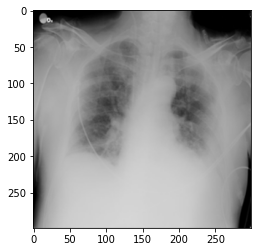

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(299, 299, 3)

In [ ]:
def loadImages(path,url,target):
  images=[]
  labels=[]
  for i in range (len(url)):
    img_path=path+"/"+url[i]
    img=cv2.imread(img_path)
   # img=cv2.resize(img,(100,100))
    labels.append(target)
    images.append(img)
  return images,labels


In [ ]:
covid_path="/content/COVID-19_Radiography_Dataset/COVID/images"
covid_url=os.listdir(covid_path)
covid_images,covid_targets=loadImages(covid_path,covid_url,1)

len(covid_url),len(covid_images)


(3616, 3616)

In [ ]:
normal_path="/content/COVID-19_Radiography_Dataset/Normal/images"
normal_url=os.listdir(normal_path)
normal_images,normal_targets=loadImages(normal_path,normal_url,0)
len(normal_url),len(normal_images)


(10192, 10192)

In [ ]:
import numpy as np
covid_images=np.asarray(covid_images)         # list to numpy array to find shape 
normal_images=np.asarray(normal_images)

In [ ]:
data=np.r_[covid_images,normal_images]
data.shape

(13808, 299, 299, 3)

In [ ]:
targets=np.r_[covid_targets,normal_targets]
targets.shape

(13808,)

In [ ]:
data=data/255.0

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split(data,targets,test_size=0.25)

In [ ]:
import tensorflow as tf


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
model=Sequential([
                  Conv2D(32,3,input_shape=(100,100,3),activation='relu'),
                  MaxPooling2D(),
                  Conv2D(16,3,activation='relu'),
                  MaxPooling2D(),
                  Conv2D(16,3,activation='relu'),
                  MaxPooling2D(),
                  Flatten(),
                  Dense(512,activation='relu'),
                   Dense(256,activation='relu'),
                  Dense(1,activation='sigmoid')

])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test,y_test))